<a href="https://colab.research.google.com/github/M-S-ibrahim/Diabetes-Prediction-System-/blob/main/Diabees_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Importation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install imbalanced-learn scikit-learn==1.3.1
# Install a compatible scikit-learn version along with imbalanced-learn
# It ensures both packages align correctly.

from imblearn.over_sampling import SMOTE

# Load dataset

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alexteboul/diabetes-health-indicators-dataset
! unzip diabetes-health-indicators-dataset.zip

Saving kaggle.json to kaggle.json
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
 66% 4.00M/6.03M [00:01<00:00, 4.46MB/s]
100% 6.03M/6.03M [00:01<00:00, 4.57MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


# pandas datafram

In [ ]:
data = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Data descriptive view

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Duplicate Value

In [ ]:
duplicate = data[data.duplicated()]
print(duplicate)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242                1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563                0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700                0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160                0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332                0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492              1.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

In [ ]:
data = data.drop_duplicates()
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
missing_data = data.isnull().sum()
missing_data

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


# Feuture Engineering

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# data spliting

In [ ]:
X = data.drop(['Diabetes_binary', 'Income', 'Education'], axis=1)
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance

In [ ]:
featureimportance = model.feature_importances_
featureimportance

array([0.04463186, 0.02743598, 0.00430003, 0.23619834, 0.03759129,
       0.01446134, 0.01973533, 0.030614  , 0.03768534, 0.03139014,
       0.00857965, 0.01085932, 0.01821595, 0.076338  , 0.08170632,
       0.11208405, 0.02551038, 0.03041661, 0.15224606])

In [ ]:
newData = pd.DataFrame({'Feature': X.columns, 'Importance': featureimportance})
newData = newData.sort_values(by='Importance', ascending=False)
newData

,Feature,Importance
3,BMI,0.236198
18,Age,0.152246
15,PhysHlth,0.112084
14,MentHlth,0.081706
13,GenHlth,0.076338
0,HighBP,0.044632
8,Fruits,0.037685
4,Smoker,0.037591
9,Veggies,0.031390
7,PhysActivity,0.030614


In [ ]:
lessimportant = newData[newData['Importance'] > 0.014]
lessimportant

,Feature,Importance
3,BMI,0.236198
18,Age,0.152246
15,PhysHlth,0.112084
14,MentHlth,0.081706
13,GenHlth,0.076338
0,HighBP,0.044632
8,Fruits,0.037685
4,Smoker,0.037591
9,Veggies,0.031390
7,PhysActivity,0.030614


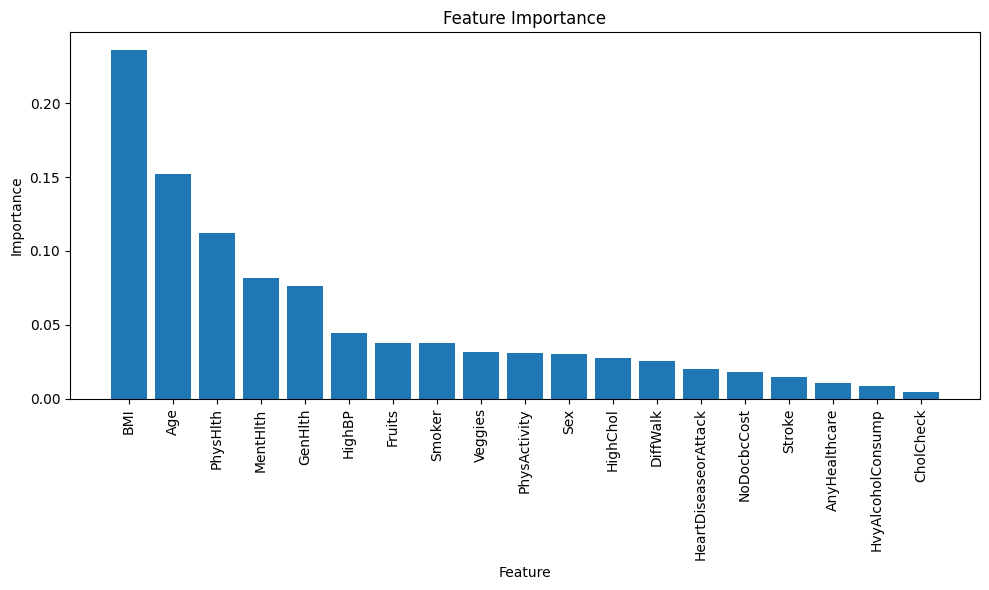

In [ ]:


# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(newData['Feature'], newData['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
data = data.drop(['AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck', 'Income', 'Education'], axis=1)
data

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


# class imbalance

In [ ]:
data['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,194377
1.0,35097


In [ ]:
data['PhysHlth'].value_counts()

,count
PhysHlth,
0.0,136578
30.0,19385
2.0,14491
1.0,11073
3.0,8435
5.0,7595
10.0,5588
15.0,4914
7.0,4531


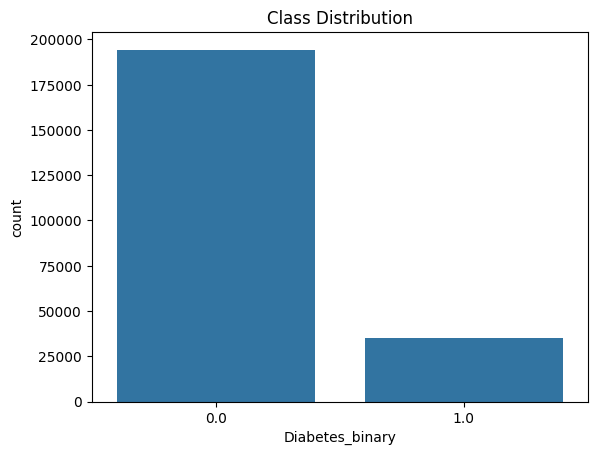

In [ ]:
sns.countplot(x='Diabetes_binary', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:
smote = SMOTE(sampling_strategy = 'minority', k_neighbors= 5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)


In [ ]:
sample = pd.DataFrame(X_resampled)
sample['Diabetes_binary'] = y_resampled
sample

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_binary
0,1.0,1.000000,1.0,40.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,5.000000,18.000000,15.000000,1.000000,0.000000,9.000000,0.0
1,0.0,0.000000,0.0,25.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.0
2,1.0,1.000000,1.0,28.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,0.000000,9.000000,0.0
3,1.0,0.000000,1.0,27.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.0
4,1.0,1.000000,1.0,24.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.0,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388749,0.0,1.000000,1.0,35.000000,0.472586,0.000000,0.000000,1.0,1.000000,1.000000,0.0,1.000000,0.472586,2.472586,0.000000,14.000000,0.527414,0.000000,11.000000,1.0
388750,1.0,1.000000,1.0,35.045383,1.000000,0.045383,0.045383,0.0,0.000000,0.954617,0.0,1.000000,0.000000,4.045383,11.909235,25.000000,1.000000,0.954617,9.045383,1.0
388751,1.0,1.000000,1.0,36.000000,0.358114,0.000000,1.000000,1.0,0.358114,1.000000,0.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.641886,1.000000,11.000000,1.0
388752,1.0,1.000000,1.0,33.000000,1.000000,0.000000,0.821229,1.0,0.178771,1.000000,0.0,1.000000,0.000000,4.000000,0.000000,30.000000,0.000000,1.000000,10.000000,1.0


In [ ]:
sample['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,194377
1.0,194377


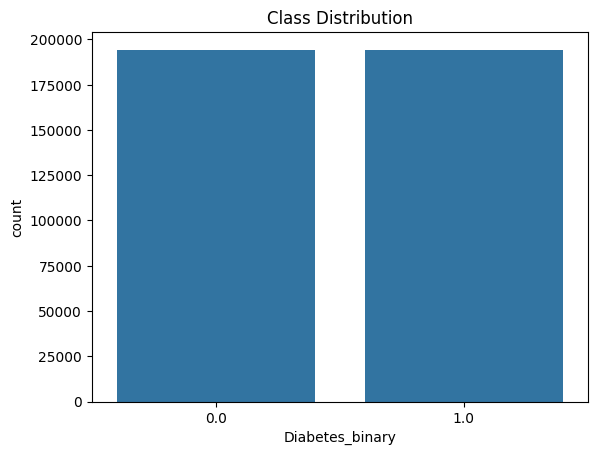

In [ ]:
sns.countplot(x='Diabetes_binary', data=sample)
plt.title('Class Distribution')
plt.show()

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    max_iter = 200
)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# ... (your existing code) ...

# After fitting the model:
print(model.feature_names_in_)

['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age']


In [ ]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'actual':y_test, 'Predicted':y_pred})
result

,actual,Predicted
386447,1.0,0.0
167378,0.0,0.0
268993,1.0,1.0
116612,0.0,1.0
366544,1.0,1.0
...,...,...
176723,0.0,0.0
108796,0.0,0.0
101297,0.0,1.0
249356,1.0,0.0


In [ ]:
pred_prob = model.predict_proba(X_test)
#Prob_result = pd.DataFrame(pred_prob, columns=['Prob_0', 'Prob_1'])
Prob_result = pd.DataFrame({'actual':y_test, 'Predicted':y_pred, 'Prob_0': pred_prob[:, 0] * 100, 'Prob_1': pred_prob[:, 1]* 100})

Prob_result


,actual,Predicted,Prob_0,Prob_1
386447,1.0,0.0,50.757258,49.242742
167378,0.0,0.0,64.270345,35.729655
268993,1.0,1.0,24.367991,75.632009
116612,0.0,1.0,45.405618,54.594382
366544,1.0,1.0,20.059659,79.940341
...,...,...,...,...
176723,0.0,0.0,72.251078,27.748922
108796,0.0,0.0,74.876568,25.123432
101297,0.0,1.0,37.654508,62.345492
249356,1.0,0.0,58.219669,41.780331


In [ ]:
accuurate_rate = accuracy_score(y_test, y_pred)
print(f"Accuracy Rate: {accuurate_rate.round(2) * 100}")

Accuracy Rate: 74.0


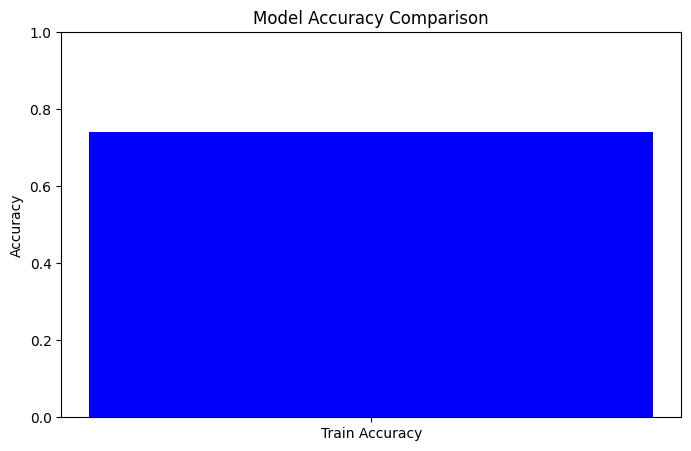

In [ ]:
labels = ["Train Accuracy"]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, accuurate_rate, color=['blue'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()

In [ ]:
conf_rate = confusion_matrix(y_test, y_pred)
print(conf_rate)

[[41615 16641]
 [13643 44728]]


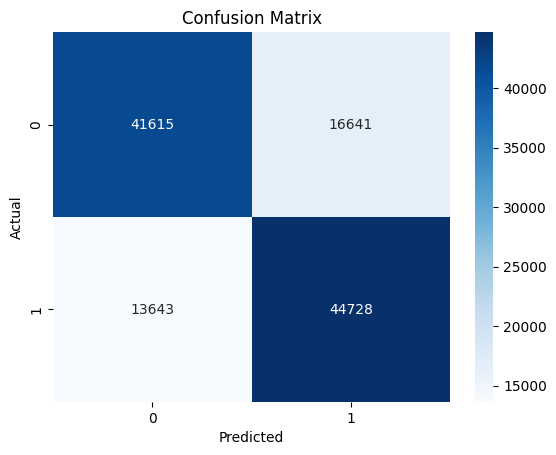

In [ ]:
sns.heatmap(conf_rate, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving the Model

In [ ]:
import pickle

with open('Diabetes_model.pkl', 'wb') as file:
  # Dump the model into the
  pickle.dump(model, file)
  print('Model saved')

Model saved
